<a href="https://colab.research.google.com/github/esatkaygisiz/Github-Example/blob/master/lending_club_hw_trees_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import tree
import warnings
warnings.filterwarnings("ignore")


In [2]:
lc_data =  pd.read_csv('https://raw.githubusercontent.com/cjflanagan/cs68/master/lending_club_training_data_subset.csv')

In [3]:
#print('Number of NAN values: {}'.format(lc_data.isna()))
lc_data

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,...,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,65230,92451797,NaN,26450.0,26450.0,26450.0,60 months,18.99%,685.99,D,D3,Project Accountant,3 years,RENT,63000.0,Not Verified,Nov-2016,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,100xx,NY,1.75,2.0,Sep-2007,675.0,679.0,1.0,11.0,NaN,6.0,0.0,204.0,2.8%,14.0,w,0.0,...,0.0,18914.0,6155.0,7300.0,11614.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,36521,94187830,NaN,12000.0,12000.0,12000.0,36 months,11.44%,395.37,B,B4,Sr Business Analyst,4 years,RENT,85000.0,Source Verified,Nov-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,786xx,TX,11.48,0.0,Aug-2008,680.0,684.0,0.0,33.0,NaN,11.0,0.0,12855.0,59.2%,18.0,w,0.0,...,0.0,52683.0,38686.0,15000.0,30983.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,25712,93882482,NaN,1000.0,1000.0,1000.0,36 months,15.99%,35.16,C,C5,Maintenance,3 years,RENT,90000.0,Source Verified,Dec-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,Other,557xx,MN,10.76,0.0,Feb-1999,695.0,699.0,0.0,NaN,NaN,13.0,0.0,18157.0,99.2%,27.0,w,0.0,...,0.0,56789.0,62872.0,17800.0,38489.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,92973,91238602,NaN,10000.0,10000.0,10000.0,36 months,10.99%,327.34,B,B4,NaN,NaN,RENT,40000.0,Verified,Oct-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,224xx,VA,20.43,0.0,May-2005,680.0,684.0,0.0,51.0,NaN,10.0,0.0,6771.0,44%,32.0,f,0.0,...,0.0,42402.0,26059.0,7300.0,27002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,16335,94465406,NaN,4500.0,4500.0,4500.0,36 months,26.24%,181.89,E,E5,Forman,5 years,RENT,30000.0,Verified,Dec-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,Other,322xx,FL,23.76,0.0,Feb-2012,660.0,664.0,1.0,28.0,78.0,7.0,1.0,2483.0,59.1%,7.0,f,0.0,...,0.0,54722.0,50339.0,300.0,50522.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [4]:
lc_data.dropna(axis=0, how='all', thresh=None, subset=None, inplace=True)
lc_data

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,...,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,65230,92451797,NaN,26450.0,26450.0,26450.0,60 months,18.99%,685.99,D,D3,Project Accountant,3 years,RENT,63000.0,Not Verified,Nov-2016,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,100xx,NY,1.75,2.0,Sep-2007,675.0,679.0,1.0,11.0,NaN,6.0,0.0,204.0,2.8%,14.0,w,0.0,...,0.0,18914.0,6155.0,7300.0,11614.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,36521,94187830,NaN,12000.0,12000.0,12000.0,36 months,11.44%,395.37,B,B4,Sr Business Analyst,4 years,RENT,85000.0,Source Verified,Nov-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,786xx,TX,11.48,0.0,Aug-2008,680.0,684.0,0.0,33.0,NaN,11.0,0.0,12855.0,59.2%,18.0,w,0.0,...,0.0,52683.0,38686.0,15000.0,30983.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,25712,93882482,NaN,1000.0,1000.0,1000.0,36 months,15.99%,35.16,C,C5,Maintenance,3 years,RENT,90000.0,Source Verified,Dec-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,Other,557xx,MN,10.76,0.0,Feb-1999,695.0,699.0,0.0,NaN,NaN,13.0,0.0,18157.0,99.2%,27.0,w,0.0,...,0.0,56789.0,62872.0,17800.0,38489.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,92973,91238602,NaN,10000.0,10000.0,10000.0,36 months,10.99%,327.34,B,B4,NaN,NaN,RENT,40000.0,Verified,Oct-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,224xx,VA,20.43,0.0,May-2005,680.0,684.0,0.0,51.0,NaN,10.0,0.0,6771.0,44%,32.0,f,0.0,...,0.0,42402.0,26059.0,7300.0,27002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,16335,94465406,NaN,4500.0,4500.0,4500.0,36 months,26.24%,181.89,E,E5,Forman,5 years,RENT,30000.0,Verified,Dec-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,Other,322xx,FL,23.76,0.0,Feb-2012,660.0,664.0,1.0,28.0,78.0,7.0,1.0,2483.0,59.1%,7.0,f,0.0,...,0.0,54722.0,50339.0,300.0,50522.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [5]:
lc_data.dropna(axis=1, how='all', thresh=None, subset=None, inplace=True)
lc_data

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,...,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,65230,92451797,26450.0,26450.0,26450.0,60 months,18.99%,685.99,D,D3,Project Accountant,3 years,RENT,63000.0,Not Verified,Nov-2016,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,100xx,NY,1.75,2.0,Sep-2007,675.0,679.0,1.0,11.0,NaN,6.0,0.0,204.0,2.8%,14.0,w,0.0,0.0,22329.530000,...,6.0,6.0,4.0,7.0,2.0,6.0,0.0,0.0,1.0,3.0,66.7,0.0,0.0,0.0,18914.0,6155.0,7300.0,11614.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,36521,94187830,12000.0,12000.0,12000.0,36 months,11.44%,395.37,B,B4,Sr Business Analyst,4 years,RENT,85000.0,Source Verified,Nov-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,786xx,TX,11.48,0.0,Aug-2008,680.0,684.0,0.0,33.0,NaN,11.0,0.0,12855.0,59.2%,18.0,w,0.0,0.0,12458.596524,...,6.0,2.0,10.0,16.0,6.0,11.0,0.0,0.0,0.0,3.0,88.9,60.0,0.0,0.0,52683.0,38686.0,15000.0,30983.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,25712,93882482,1000.0,1000.0,1000.0,36 months,15.99%,35.16,C,C5,Maintenance,3 years,RENT,90000.0,Source Verified,Dec-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,Other,557xx,MN,10.76,0.0,Feb-1999,695.0,699.0,0.0,NaN,NaN,13.0,0.0,18157.0,99.2%,27.0,w,0.0,0.0,1000.600733,...,10.0,16.0,9.0,11.0,9.0,13.0,0.0,0.0,0.0,1.0,100.0,100.0,0.0,0.0,56789.0,62872.0,17800.0,38489.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,92973,91238602,10000.0,10000.0,10000.0,36 months,10.99%,327.34,B,B4,NaN,NaN,RENT,40000.0,Verified,Oct-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,224xx,VA,20.43,0.0,May-2005,680.0,684.0,0.0,51.0,NaN,10.0,0.0,6771.0,44%,32.0,f,0.0,0.0,11778.122232,...,10.0,14.0,9.0,15.0,5.0,10.0,0.0,0.0,0.0,2.0,93.5,60.0,0.0,0.0,42402.0,26059.0,7300.0,27002.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,16335,94465406,4500.0,4500.0,4500.0,36 months,26.24%,181.89,E,E5,Forman,5 years,RENT,30000.0,Verified,Dec-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,Other,322xx,FL,23.76,0.0,Feb-2012,660.0,664.0,1.0,28.0,78.0,7.0,1.0,2483.0,59.1%,7.0,f,0.0,0.0,6534.574960,...,1.0,3.0,4.0,4.0,4.0,7.0,0.0,0.0,0.0,1.0,85.7,100.0,0.0,0.0,54722.0,50339.0,300.0,50522.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,85824

In [7]:
def missing_values_table(df):
  missing_value_cnt = lc_data.isnull().sum()
  percentage = 100 * lc_data.isnull().sum() / len(lc_data)
  data_types = lc_data.dtypes
  missing_values_table = pd.concat([missing_value_cnt, percentage, data_types], axis=1)
  missing_values_table = missing_values_table.rename(columns = {0 : 'Missing Values', 
                                                       1 : 'Percentage',
                                                       2 : 'Data Types'})
  missing_values_table = missing_values_table[
                                      missing_values_table.iloc[:,1] != 0].sort_values(
                                      'Percentage', ascending=False).round(1)
  return missing_values_table


In [8]:
miss_values_table = missing_values_table(lc_data)
miss_values_columns = miss_values_table[miss_values_table.iloc[:,1] >= 75]
lc_data

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,...,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,65230,92451797,26450.0,26450.0,26450.0,60 months,18.99%,685.99,D,D3,Project Accountant,3 years,RENT,63000.0,Not Verified,Nov-2016,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,100xx,NY,1.75,2.0,Sep-2007,675.0,679.0,1.0,11.0,NaN,6.0,0.0,204.0,2.8%,14.0,w,0.0,0.0,22329.530000,...,6.0,6.0,4.0,7.0,2.0,6.0,0.0,0.0,1.0,3.0,66.7,0.0,0.0,0.0,18914.0,6155.0,7300.0,11614.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,36521,94187830,12000.0,12000.0,12000.0,36 months,11.44%,395.37,B,B4,Sr Business Analyst,4 years,RENT,85000.0,Source Verified,Nov-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,786xx,TX,11.48,0.0,Aug-2008,680.0,684.0,0.0,33.0,NaN,11.0,0.0,12855.0,59.2%,18.0,w,0.0,0.0,12458.596524,...,6.0,2.0,10.0,16.0,6.0,11.0,0.0,0.0,0.0,3.0,88.9,60.0,0.0,0.0,52683.0,38686.0,15000.0,30983.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,25712,93882482,1000.0,1000.0,1000.0,36 months,15.99%,35.16,C,C5,Maintenance,3 years,RENT,90000.0,Source Verified,Dec-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,Other,557xx,MN,10.76,0.0,Feb-1999,695.0,699.0,0.0,NaN,NaN,13.0,0.0,18157.0,99.2%,27.0,w,0.0,0.0,1000.600733,...,10.0,16.0,9.0,11.0,9.0,13.0,0.0,0.0,0.0,1.0,100.0,100.0,0.0,0.0,56789.0,62872.0,17800.0,38489.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,92973,91238602,10000.0,10000.0,10000.0,36 months,10.99%,327.34,B,B4,NaN,NaN,RENT,40000.0,Verified,Oct-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,224xx,VA,20.43,0.0,May-2005,680.0,684.0,0.0,51.0,NaN,10.0,0.0,6771.0,44%,32.0,f,0.0,0.0,11778.122232,...,10.0,14.0,9.0,15.0,5.0,10.0,0.0,0.0,0.0,2.0,93.5,60.0,0.0,0.0,42402.0,26059.0,7300.0,27002.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,16335,94465406,4500.0,4500.0,4500.0,36 months,26.24%,181.89,E,E5,Forman,5 years,RENT,30000.0,Verified,Dec-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,Other,322xx,FL,23.76,0.0,Feb-2012,660.0,664.0,1.0,28.0,78.0,7.0,1.0,2483.0,59.1%,7.0,f,0.0,0.0,6534.574960,...,1.0,3.0,4.0,4.0,4.0,7.0,0.0,0.0,0.0,1.0,85.7,100.0,0.0,0.0,54722.0,50339.0,300.0,50522.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,85824

Drop all columns with the percentage of NaN > 75%


In [9]:
lc_data.drop(columns=miss_values_columns.index, inplace=True)
lc_data

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,65230,92451797,26450.0,26450.0,26450.0,60 months,18.99%,685.99,D,D3,Project Accountant,3 years,RENT,63000.0,Not Verified,Nov-2016,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,100xx,NY,1.75,2.0,Sep-2007,675.0,679.0,1.0,11.0,6.0,0.0,204.0,2.8%,14.0,w,0.0,0.0,22329.530000,22329.53,...,2.0,3.0,1026.0,7096.0,2.8,0.0,0.0,81.0,110.0,6.0,5.0,0.0,6.0,19.0,6.0,11.0,0.0,2.0,2.0,4.0,6.0,6.0,4.0,7.0,2.0,6.0,0.0,0.0,1.0,3.0,66.7,0.0,0.0,0.0,18914.0,6155.0,7300.0,11614.0,N,N
1,36521,94187830,12000.0,12000.0,12000.0,36 months,11.44%,395.37,B,B4,Sr Business Analyst,4 years,RENT,85000.0,Source Verified,Nov-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,786xx,TX,11.48,0.0,Aug-2008,680.0,684.0,0.0,33.0,11.0,0.0,12855.0,59.2%,18.0,w,0.0,0.0,12458.596524,12458.60,...,0.0,5.0,3869.0,4719.0,68.5,0.0,0.0,59.0,99.0,5.0,5.0,0.0,5.0,54.0,16.0,33.0,1.0,4.0,6.0,5.0,6.0,2.0,10.0,16.0,6.0,11.0,0.0,0.0,0.0,3.0,88.9,60.0,0.0,0.0,52683.0,38686.0,15000.0,30983.0,N,N
2,25712,93882482,1000.0,1000.0,1000.0,36 months,15.99%,35.16,C,C5,Maintenance,3 years,RENT,90000.0,Source Verified,Dec-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,Other,557xx,MN,10.76,0.0,Feb-1999,695.0,699.0,0.0,NaN,13.0,0.0,18157.0,99.2%,27.0,w,0.0,0.0,1000.600733,1000.60,...,0.0,2.0,4836.0,124.0,99.3,0.0,0.0,134.0,213.0,23.0,10.0,0.0,23.0,NaN,23.0,NaN,0.0,8.0,8.0,8.0,10.0,16.0,9.0,11.0,9.0,13.0,0.0,0.0,0.0,1.0,100.0,100.0,0.0,0.0,56789.0,62872.0,17800.0,38489.0,N,N
3,92973,91238602,10000.0,10000.0,10000.0,36 months,10.99%,327.34,B,B4,NaN,NaN,RENT,40000.0,Verified,Oct-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,224xx,VA,20.43,0.0,May-2005,680.0,684.0,0.0,51.0,10.0,0.0,6771.0,44%,32.0,f,0.0,0.0,11778.122232,11778.12,...,0.0,5.0,2895.0,3190.0,56.3,0.0,0.0,137.0,122.0,4.0,4.0,2.0,4.0,NaN,14.0,60.0,0.0,4.0,5.0,5.0,10.0,14.0,9.0,15.0,5.0,10.0,0.0,0.0,0.0,2.0,93.5,60.0,0.0,0.0,42402.0,26059.0,7300.0,27002.0,N,N
4,16335,94465406,4500.0,4500.0,4500.0,36 months,26.24%,181.89,E,E5,Forman,5 years,RENT,30000.0,Verified,Dec-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,Other,322xx,FL,23.76,0.0,Feb-2012,660.0,664.0,1.0,28.0,7.0,1.0,2483.0,59.1%,7.0,f,0.0,0.0,6534.574960,6534.57,...,1.0,4.0,7191.0,64.0,78.7,0.0,0.0,58.0,31.0,2.0,2.0,0.0,15.0,NaN,2.0,NaN,1.0,1.0,4.0,1.0,1.0,3.0,4.0,4.0,4.0,7.0,0.0,0.0,0.0,1.0,85.7,100.0,0.0,0.0,54722.0,50339.0,300.0,50522.0,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [10]:
miss_values_table = missing_values_table(lc_data)
miss_values_table

,Missing Values,Percentage,Data Types
mths_since_recent_bc_dlq,14812,74.1,float64
mths_since_last_major_derog,13894,69.5,float64
mths_since_recent_revol_delinq,12613,63.1,float64
mths_since_last_delinq,9162,45.8,float64
il_util,2371,11.9,float64
mths_since_recent_inq,1992,10.0,float64
emp_title,1562,7.8,object
emp_length,1536,7.7,object
num_tl_120dpd_2m,1239,6.2,float64
mths_since_rcnt_il,532,2.7,float64


In [11]:
print(lc_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Columns: 111 entries, Unnamed: 0 to debt_settlement_flag
dtypes: float64(85), int64(2), object(24)
memory usage: 17.1+ MB
None


Find and Delete NaN column

In [12]:
# Find if there any NaN values in the data
Nan_Columns = lc_data.columns[lc_data.isna().any()].tolist()
# NaN values didn't found. -- Good dataset :)
print(Nan_Columns)

['emp_title', 'emp_length', 'title', 'dti', 'mths_since_last_delinq', 'revol_util', 'last_pymnt_d', 'mths_since_last_major_derog', 'mths_since_rcnt_il', 'il_util', 'all_util', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_tl_120dpd_2m', 'percent_bc_gt_75', 'hardship_flag']


In [13]:
lc_data.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,65230,92451797,26450.0,26450.0,26450.0,60 months,18.99%,685.99,D,D3,Project Accountant,3 years,RENT,63000.0,Not Verified,Nov-2016,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,100xx,NY,1.75,2.0,Sep-2007,675.0,679.0,1.0,11.0,6.0,0.0,204.0,2.8%,14.0,w,0.0,0.0,22329.530000,22329.53,...,2.0,3.0,1026.0,7096.0,2.8,0.0,0.0,81.0,110.0,6.0,5.0,0.0,6.0,19.0,6.0,11.0,0.0,2.0,2.0,4.0,6.0,6.0,4.0,7.0,2.0,6.0,0.0,0.0,1.0,3.0,66.7,0.0,0.0,0.0,18914.0,6155.0,7300.0,11614.0,N,N
1,36521,94187830,12000.0,12000.0,12000.0,36 months,11.44%,395.37,B,B4,Sr Business Analyst,4 years,RENT,85000.0,Source Verified,Nov-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,786xx,TX,11.48,0.0,Aug-2008,680.0,684.0,0.0,33.0,11.0,0.0,12855.0,59.2%,18.0,w,0.0,0.0,12458.596524,12458.60,...,0.0,5.0,3869.0,4719.0,68.5,0.0,0.0,59.0,99.0,5.0,5.0,0.0,5.0,54.0,16.0,33.0,1.0,4.0,6.0,5.0,6.0,2.0,10.0,16.0,6.0,11.0,0.0,0.0,0.0,3.0,88.9,60.0,0.0,0.0,52683.0,38686.0,15000.0,30983.0,N,N
2,25712,93882482,1000.0,1000.0,1000.0,36 months,15.99%,35.16,C,C5,Maintenance,3 years,RENT,90000.0,Source Verified,Dec-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,Other,557xx,MN,10.76,0.0,Feb-1999,695.0,699.0,0.0,NaN,13.0,0.0,18157.0,99.2%,27.0,w,0.0,0.0,1000.600733,1000.60,...,0.0,2.0,4836.0,124.0,99.3,0.0,0.0,134.0,213.0,23.0,10.0,0.0,23.0,NaN,23.0,NaN,0.0,8.0,8.0,8.0,10.0,16.0,9.0,11.0,9.0,13.0,0.0,0.0,0.0,1.0,100.0,100.0,0.0,0.0,56789.0,62872.0,17800.0,38489.0,N,N
3,92973,91238602,10000.0,10000.0,10000.0,36 months,10.99%,327.34,B,B4,NaN,NaN,RENT,40000.0,Verified,Oct-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,224xx,VA,20.43,0.0,May-2005,680.0,684.0,0.0,51.0,10.0,0.0,6771.0,44%,32.0,f,0.0,0.0,11778.122232,11778.12,...,0.0,5.0,2895.0,3190.0,56.3,0.0,0.0,137.0,122.0,4.0,4.0,2.0,4.0,NaN,14.0,60.0,0.0,4.0,5.0,5.0,10.0,14.0,9.0,15.0,5.0,10.0,0.0,0.0,0.0,2.0,93.5,60.0,0.0,0.0,42402.0,26059.0,7300.0,27002.0,N,N
4,16335,94465406,4500.0,4500.0,4500.0,36 months,26.24%,181.89,E,E5,Forman,5 years,RENT,30000.0,Verified,Dec-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,Other,322xx,FL,23.76,0.0,Feb-2012,660.0,664.0,1.0,28.0,7.0,1.0,2483.0,59.1%,7.0,f,0.0,0.0,6534.574960,6534.57,...,1.0,4.0,7191.0,64.0,78.7,0.0,0.0,58.0,31.0,2.0,2.0,0.0,15.0,NaN,2.0,NaN,1.0,1.0,4.0,1.0,1.0,3.0,4.0,4.0,4.0,7.0,0.0,0.0,0.0,1.0,85.7,100.0,0.0,0.0,54722.0,50339.0,300.0,50522.0,N,N


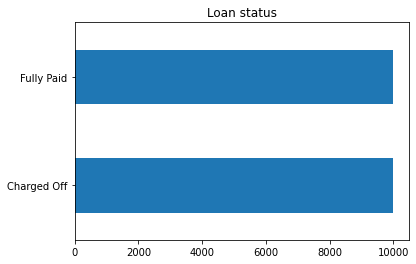

In [14]:
lc_data.loan_status.value_counts().plot(kind='barh', title='Loan status')
plt.show()

In [15]:
lc_data.loan_status = lc_data.loan_status.replace({'Charged Off':1, 'Fully Paid':0})
#print(lc_data.columns.to_series().groupby(lc_data.dtypes).groups)

In [16]:
unique_list= lc_data.apply(lambda x: x.nunique()).sort_values()
print(type(unique_list))
print(unique_list)

<class 'pandas.core.series.Series'>
out_prncp               1
out_prncp_inv           1
policy_code             1
pymnt_plan              1
num_tl_120dpd_2m        2
                    ...  
total_pymnt_inv     19515
total_pymnt         19716
url                 20000
id                  20000
Unnamed: 0          20000
Length: 111, dtype: int64


In [17]:
num_cols = lc_data.columns[lc_data.dtypes !='object'].tolist()
num_cols

['Unnamed: 0',
 'id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'annual_inc',
 'loan_status',
 'dti',
 'delinq_2yrs',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'del

In [18]:
for column in num_cols :
  if lc_data[column].isnull().sum() > 0 :
    lc_data[column].fillna(lc_data[column].mean(), inplace=True)


Find the Categorical Columns List

In [19]:
categorical_cols = lc_data.columns[lc_data.dtypes=='object'].tolist()
categorical_cols

['term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'revol_util',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d',
 'application_type',
 'hardship_flag',
 'debt_settlement_flag']

Find and Delete the single value columns if any

In [20]:
single_valued_colmmns = lc_data[categorical_cols].nunique()[lc_data[categorical_cols].nunique() == 1].index.tolist()
single_valued_colmmns

['pymnt_plan']

Find the Binary columns and convert them to Numerical columns

In [21]:
binary_colmmns = lc_data[categorical_cols].nunique()[lc_data[categorical_cols].nunique() == 2].index.tolist()
binary_colmmns

['term',
 'initial_list_status',
 'application_type',
 'hardship_flag',
 'debt_settlement_flag']

In [22]:
# Transform binary_columns
#le = LabelEncoder()
for column in binary_colmmns :
  if lc_data[column].isnull().sum() > 0 :
    lc_data[column].fillna(method = 'ffill', inplace=True)
  #lc_data[column] = LabelEncoder().fit_transform(lc_data[column])


In [23]:
lc_data.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,65230,92451797,26450.0,26450.0,26450.0,60 months,18.99%,685.99,D,D3,Project Accountant,3 years,RENT,63000.0,Not Verified,Nov-2016,1,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,100xx,NY,1.75,2.0,Sep-2007,675.0,679.0,1.0,11.000000,6.0,0.0,204.0,2.8%,14.0,w,0.0,0.0,22329.530000,22329.53,...,2.0,3.0,1026.0,7096.0,2.8,0.0,0.0,81.0,110.0,6.0,5.0,0.0,6.0,19.000000,6.0,11.000000,0.0,2.0,2.0,4.0,6.0,6.0,4.0,7.0,2.0,6.0,0.0,0.0,1.0,3.0,66.7,0.0,0.0,0.0,18914.0,6155.0,7300.0,11614.0,N,N
1,36521,94187830,12000.0,12000.0,12000.0,36 months,11.44%,395.37,B,B4,Sr Business Analyst,4 years,RENT,85000.0,Source Verified,Nov-2016,0,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,786xx,TX,11.48,0.0,Aug-2008,680.0,684.0,0.0,33.000000,11.0,0.0,12855.0,59.2%,18.0,w,0.0,0.0,12458.596524,12458.60,...,0.0,5.0,3869.0,4719.0,68.5,0.0,0.0,59.0,99.0,5.0,5.0,0.0,5.0,54.000000,16.0,33.000000,1.0,4.0,6.0,5.0,6.0,2.0,10.0,16.0,6.0,11.0,0.0,0.0,0.0,3.0,88.9,60.0,0.0,0.0,52683.0,38686.0,15000.0,30983.0,N,N
2,25712,93882482,1000.0,1000.0,1000.0,36 months,15.99%,35.16,C,C5,Maintenance,3 years,RENT,90000.0,Source Verified,Dec-2016,0,n,https://lendingclub.com/browse/loanDetail.acti...,other,Other,557xx,MN,10.76,0.0,Feb-1999,695.0,699.0,0.0,33.568094,13.0,0.0,18157.0,99.2%,27.0,w,0.0,0.0,1000.600733,1000.60,...,0.0,2.0,4836.0,124.0,99.3,0.0,0.0,134.0,213.0,23.0,10.0,0.0,23.0,37.936777,23.0,34.349398,0.0,8.0,8.0,8.0,10.0,16.0,9.0,11.0,9.0,13.0,0.0,0.0,0.0,1.0,100.0,100.0,0.0,0.0,56789.0,62872.0,17800.0,38489.0,N,N
3,92973,91238602,10000.0,10000.0,10000.0,36 months,10.99%,327.34,B,B4,NaN,NaN,RENT,40000.0,Verified,Oct-2016,0,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,224xx,VA,20.43,0.0,May-2005,680.0,684.0,0.0,51.000000,10.0,0.0,6771.0,44%,32.0,f,0.0,0.0,11778.122232,11778.12,...,0.0,5.0,2895.0,3190.0,56.3,0.0,0.0,137.0,122.0,4.0,4.0,2.0,4.0,37.936777,14.0,60.000000,0.0,4.0,5.0,5.0,10.0,14.0,9.0,15.0,5.0,10.0,0.0,0.0,0.0,2.0,93.5,60.0,0.0,0.0,42402.0,26059.0,7300.0,27002.0,N,N
4,16335,94465406,4500.0,4500.0,4500.0,36 months,26.24%,181.89,E,E5,Forman,5 years,RENT,30000.0,Verified,Dec-2016,0,n,https://lendingclub.com/browse/loanDetail.acti...,other,Other,322xx,FL,23.76,0.0,Feb-2012,660.0,664.0,1.0,28.000000,7.0,1.0,2483.0,59.1%,7.0,f,0.0,0.0,6534.574960,6534.57,...,1.0,4.0,7191.0,64.0,78.7,0.0,0.0,58.0,31.0,2.0,2.0,0.0,15.0,37.936777,2.0,34.349398,1.0,1.0,4.0,1.0,1.0,3.0,4.0,4.0,4.0,7.0,0.0,0.0,0.0,1.0,85.7,100.0,0.0,0.0,54722.0,50339.0,300.0,50522.0,N,N


In [24]:
#lc_data.head()
multi_valued_colmmns = lc_data[categorical_cols].nunique()[lc_data[categorical_cols].nunique() > 2].index.tolist()
multi_valued_colmmns

['int_rate',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'revol_util',
 'last_pymnt_d',
 'last_credit_pull_d']

In [27]:
for column in multi_valued_colmmns :
  if lc_data[column].isnull().sum() > 0 :
    lc_data[column].fillna(method = 'ffill', inplace=True)


In [26]:
lc_data.head()
#lc_data.loan_status = lc_data.loan_status.replace({'Charged Off':1, 'Fully Paid':0})
#y = lc_data.pop('loan_status')

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,65230,92451797,26450.0,26450.0,26450.0,60 months,18.99%,685.99,D,D3,Project Accountant,3 years,RENT,63000.0,Not Verified,Nov-2016,1,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,100xx,NY,1.75,2.0,Sep-2007,675.0,679.0,1.0,11.000000,6.0,0.0,204.0,2.8%,14.0,w,0.0,0.0,22329.530000,22329.53,...,2.0,3.0,1026.0,7096.0,2.8,0.0,0.0,81.0,110.0,6.0,5.0,0.0,6.0,19.000000,6.0,11.000000,0.0,2.0,2.0,4.0,6.0,6.0,4.0,7.0,2.0,6.0,0.0,0.0,1.0,3.0,66.7,0.0,0.0,0.0,18914.0,6155.0,7300.0,11614.0,N,N
1,36521,94187830,12000.0,12000.0,12000.0,36 months,11.44%,395.37,B,B4,Sr Business Analyst,4 years,RENT,85000.0,Source Verified,Nov-2016,0,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,786xx,TX,11.48,0.0,Aug-2008,680.0,684.0,0.0,33.000000,11.0,0.0,12855.0,59.2%,18.0,w,0.0,0.0,12458.596524,12458.60,...,0.0,5.0,3869.0,4719.0,68.5,0.0,0.0,59.0,99.0,5.0,5.0,0.0,5.0,54.000000,16.0,33.000000,1.0,4.0,6.0,5.0,6.0,2.0,10.0,16.0,6.0,11.0,0.0,0.0,0.0,3.0,88.9,60.0,0.0,0.0,52683.0,38686.0,15000.0,30983.0,N,N
2,25712,93882482,1000.0,1000.0,1000.0,36 months,15.99%,35.16,C,C5,Maintenance,3 years,RENT,90000.0,Source Verified,Dec-2016,0,n,https://lendingclub.com/browse/loanDetail.acti...,other,Other,557xx,MN,10.76,0.0,Feb-1999,695.0,699.0,0.0,33.568094,13.0,0.0,18157.0,99.2%,27.0,w,0.0,0.0,1000.600733,1000.60,...,0.0,2.0,4836.0,124.0,99.3,0.0,0.0,134.0,213.0,23.0,10.0,0.0,23.0,37.936777,23.0,34.349398,0.0,8.0,8.0,8.0,10.0,16.0,9.0,11.0,9.0,13.0,0.0,0.0,0.0,1.0,100.0,100.0,0.0,0.0,56789.0,62872.0,17800.0,38489.0,N,N
3,92973,91238602,10000.0,10000.0,10000.0,36 months,10.99%,327.34,B,B4,Maintenance,3 years,RENT,40000.0,Verified,Oct-2016,0,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,224xx,VA,20.43,0.0,May-2005,680.0,684.0,0.0,51.000000,10.0,0.0,6771.0,44%,32.0,f,0.0,0.0,11778.122232,11778.12,...,0.0,5.0,2895.0,3190.0,56.3,0.0,0.0,137.0,122.0,4.0,4.0,2.0,4.0,37.936777,14.0,60.000000,0.0,4.0,5.0,5.0,10.0,14.0,9.0,15.0,5.0,10.0,0.0,0.0,0.0,2.0,93.5,60.0,0.0,0.0,42402.0,26059.0,7300.0,27002.0,N,N
4,16335,94465406,4500.0,4500.0,4500.0,36 months,26.24%,181.89,E,E5,Forman,5 years,RENT,30000.0,Verified,Dec-2016,0,n,https://lendingclub.com/browse/loanDetail.acti...,other,Other,322xx,FL,23.76,0.0,Feb-2012,660.0,664.0,1.0,28.000000,7.0,1.0,2483.0,59.1%,7.0,f,0.0,0.0,6534.574960,6534.57,...,1.0,4.0,7191.0,64.0,78.7,0.0,0.0,58.0,31.0,2.0,2.0,0.0,15.0,37.936777,2.0,34.349398,1.0,1.0,4.0,1.0,1.0,3.0,4.0,4.0,4.0,7.0,0.0,0.0,0.0,1.0,85.7,100.0,0.0,0.0,54722.0,50339.0,300.0,50522.0,N,N


In [28]:
lc_data.drop(columns=single_valued_colmmns, inplace=True)
lc_data

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,...,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,65230,92451797,26450.0,26450.0,26450.0,60 months,18.99%,685.99,D,D3,Project Accountant,3 years,RENT,63000.0,Not Verified,Nov-2016,1,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,100xx,NY,1.75,2.0,Sep-2007,675.0,679.0,1.0,11.000000,6.0,0.0,204.0,2.8%,14.0,w,0.0,0.0,22329.530000,22329.53,9704.73,...,2.0,3.0,1026.0,7096.000000,2.800000,0.0,0.0,81.0,110.0,6.0,5.0,0.0,6.000000,19.000000,6.000000,11.000000,0.0,2.0,2.0,4.0,6.0,6.0,4.0,7.0,2.0,6.0,0.000000,0.0,1.0,3.0,66.7,0.000000,0.0,0.0,18914.0,6155.0,7300.0,11614.0,N,N
1,36521,94187830,12000.0,12000.0,12000.0,36 months,11.44%,395.37,B,B4,Sr Business Analyst,4 years,RENT,85000.0,Source Verified,Nov-2016,0,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,786xx,TX,11.48,0.0,Aug-2008,680.0,684.0,0.0,33.000000,11.0,0.0,12855.0,59.2%,18.0,w,0.0,0.0,12458.596524,12458.60,12000.00,...,0.0,5.0,3869.0,4719.000000,68.500000,0.0,0.0,59.0,99.0,5.0,5.0,0.0,5.000000,54.000000,16.000000,33.000000,1.0,4.0,6.0,5.0,6.0,2.0,10.0,16.0,6.0,11.0,0.000000,0.0,0.0,3.0,88.9,60.000000,0.0,0.0,52683.0,38686.0,15000.0,30983.0,N,N
2,25712,93882482,1000.0,1000.0,1000.0,36 months,15.99%,35.16,C,C5,Maintenance,3 years,RENT,90000.0,Source Verified,Dec-2016,0,https://lendingclub.com/browse/loanDetail.acti...,other,Other,557xx,MN,10.76,0.0,Feb-1999,695.0,699.0,0.0,33.568094,13.0,0.0,18157.0,99.2%,27.0,w,0.0,0.0,1000.600733,1000.60,1000.00,...,0.0,2.0,4836.0,124.000000,99.300000,0.0,0.0,134.0,213.0,23.0,10.0,0.0,23.000000,37.936777,23.000000,34.349398,0.0,8.0,8.0,8.0,10.0,16.0,9.0,11.0,9.0,13.0,0.000000,0.0,0.0,1.0,100.0,100.000000,0.0,0.0,56789.0,62872.0,17800.0,38489.0,N,N
3,92973,91238602,10000.0,10000.0,10000.0,36 months,10.99%,327.34,B,B4,Maintenance,3 years,RENT,40000.0,Verified,Oct-2016,0,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,224xx,VA,20.43,0.0,May-2005,680.0,684.0,0.0,51.000000,10.0,0.0,6771.0,44%,32.0,f,0.0,0.0,11778.122232,11778.12,10000.00,...,0.0,5.0,2895.0,3190.000000,56.300000,0.0,0.0,137.0,122.0,4.0,4.0,2.0,4.000000,37.936777,14.000000,60.000000,0.0,4.0,5.0,5.0,10.0,14.0,9.0,15.0,5.0,10.0,0.000000,0.0,0.0,2.0,93.5,60.000000,0.0,0.0,42402.0,26059.0,7300.0,27002.0,N,N
4,16335,94465406,4500.0,4500.0,4500.0,36 months,26.24%,181.89,E,E5,Forman,5 years,RENT,30000.0,Verified,Dec-2016,0,https://lendingclub.com/browse/loanDetail.acti...,other,Other,322xx,FL,23.76,0.0,Feb-2012,660.0,664.0,1.0,28.000000,7.0,1.0,2483.0,59.1%,7.0,f,0.0,0.0,6534.574960,6534.57,4500.00,...,1.0,4.0,7191.0,64.000000,78.700000,0.0,0.0,58.0,31.0,2.0,2.0,0.0,15.000000,37.936777,2.000000,34.349398,1.0,1.0,4.0,1.0,1.0,3.0,4.0,4.0,4.0,7.0,0.000000,0.0,0.0,1.0,85.7,100.000000,0.0,0.0,54722.0,50339.0,300.0,50522.0,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
lc_data['emp_length'] = lc_data['emp_length'].replace({'3 years': 3, 
                                '4 years': 4,
                                '5 years': 5,
                                '< 1 year':0,
                               '10 years':10,
                              '10+ years':11})
#lc_data['emp_length']


In [29]:
#categorical_cols = [
#  'term',
#  'int_rate'
# 'grade',
# 'sub_grade',
# 'emp_length'
# 'home_ownership',
# 'verification_status',
# 'issue_d',
# 'pymnt_plan']
#categorical_cols
#dummies_adjusted_data = pd.get_dummies(data = lc_data, columns=multi_valued_colmmns, drop_first=True)
#dummies_adjusted_data

categorical_cols = [
'term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'revol_util',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d',
 'application_type',
 'hardship_flag',
 'debt_settlement_flag']
categorical_cols

['term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'revol_util',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d',
 'application_type',
 'hardship_flag',
 'debt_settlement_flag']

In [30]:
numerical_columns = [
  'loan_amnt',
  'installment',
  'delinq_2yrs',
  'fico_range_low',
  'fico_range_high',
  'total_acc'
]
numerical_columns


['loan_amnt',
 'installment',
 'delinq_2yrs',
 'fico_range_low',
 'fico_range_high',
 'total_acc']

In [31]:
lc_data.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,...,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,65230,92451797,26450.0,26450.0,26450.0,60 months,18.99%,685.99,D,D3,Project Accountant,3 years,RENT,63000.0,Not Verified,Nov-2016,1,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,100xx,NY,1.75,2.0,Sep-2007,675.0,679.0,1.0,11.000000,6.0,0.0,204.0,2.8%,14.0,w,0.0,0.0,22329.530000,22329.53,9704.73,...,2.0,3.0,1026.0,7096.0,2.8,0.0,0.0,81.0,110.0,6.0,5.0,0.0,6.0,19.000000,6.0,11.000000,0.0,2.0,2.0,4.0,6.0,6.0,4.0,7.0,2.0,6.0,0.0,0.0,1.0,3.0,66.7,0.0,0.0,0.0,18914.0,6155.0,7300.0,11614.0,N,N
1,36521,94187830,12000.0,12000.0,12000.0,36 months,11.44%,395.37,B,B4,Sr Business Analyst,4 years,RENT,85000.0,Source Verified,Nov-2016,0,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,786xx,TX,11.48,0.0,Aug-2008,680.0,684.0,0.0,33.000000,11.0,0.0,12855.0,59.2%,18.0,w,0.0,0.0,12458.596524,12458.60,12000.00,...,0.0,5.0,3869.0,4719.0,68.5,0.0,0.0,59.0,99.0,5.0,5.0,0.0,5.0,54.000000,16.0,33.000000,1.0,4.0,6.0,5.0,6.0,2.0,10.0,16.0,6.0,11.0,0.0,0.0,0.0,3.0,88.9,60.0,0.0,0.0,52683.0,38686.0,15000.0,30983.0,N,N
2,25712,93882482,1000.0,1000.0,1000.0,36 months,15.99%,35.16,C,C5,Maintenance,3 years,RENT,90000.0,Source Verified,Dec-2016,0,https://lendingclub.com/browse/loanDetail.acti...,other,Other,557xx,MN,10.76,0.0,Feb-1999,695.0,699.0,0.0,33.568094,13.0,0.0,18157.0,99.2%,27.0,w,0.0,0.0,1000.600733,1000.60,1000.00,...,0.0,2.0,4836.0,124.0,99.3,0.0,0.0,134.0,213.0,23.0,10.0,0.0,23.0,37.936777,23.0,34.349398,0.0,8.0,8.0,8.0,10.0,16.0,9.0,11.0,9.0,13.0,0.0,0.0,0.0,1.0,100.0,100.0,0.0,0.0,56789.0,62872.0,17800.0,38489.0,N,N
3,92973,91238602,10000.0,10000.0,10000.0,36 months,10.99%,327.34,B,B4,Maintenance,3 years,RENT,40000.0,Verified,Oct-2016,0,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,224xx,VA,20.43,0.0,May-2005,680.0,684.0,0.0,51.000000,10.0,0.0,6771.0,44%,32.0,f,0.0,0.0,11778.122232,11778.12,10000.00,...,0.0,5.0,2895.0,3190.0,56.3,0.0,0.0,137.0,122.0,4.0,4.0,2.0,4.0,37.936777,14.0,60.000000,0.0,4.0,5.0,5.0,10.0,14.0,9.0,15.0,5.0,10.0,0.0,0.0,0.0,2.0,93.5,60.0,0.0,0.0,42402.0,26059.0,7300.0,27002.0,N,N
4,16335,94465406,4500.0,4500.0,4500.0,36 months,26.24%,181.89,E,E5,Forman,5 years,RENT,30000.0,Verified,Dec-2016,0,https://lendingclub.com/browse/loanDetail.acti...,other,Other,322xx,FL,23.76,0.0,Feb-2012,660.0,664.0,1.0,28.000000,7.0,1.0,2483.0,59.1%,7.0,f,0.0,0.0,6534.574960,6534.57,4500.00,...,1.0,4.0,7191.0,64.0,78.7,0.0,0.0,58.0,31.0,2.0,2.0,0.0,15.0,37.936777,2.0,34.349398,1.0,1.0,4.0,1.0,1.0,3.0,4.0,4.0,4.0,7.0,0.0,0.0,0.0,1.0,85.7,100.0,0.0,0.0,54722.0,50339.0,300.0,50522.0,N,N


In [32]:
lc_data_subset = lc_data[numerical_columns + categorical_cols]
lc_data_subset.head()

,loan_amnt,installment,delinq_2yrs,fico_range_low,fico_range_high,total_acc,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,hardship_flag,debt_settlement_flag
0,26450.0,685.99,2.0,675.0,679.0,14.0,60 months,18.99%,D,D3,Project Accountant,3 years,RENT,Not Verified,Nov-2016,debt_consolidation,Debt consolidation,100xx,NY,Sep-2007,2.8%,w,Apr-2019,Oct-2019,Individual,N,N
1,12000.0,395.37,0.0,680.0,684.0,18.0,36 months,11.44%,B,B4,Sr Business Analyst,4 years,RENT,Source Verified,Nov-2016,debt_consolidation,Debt consolidation,786xx,TX,Aug-2008,59.2%,w,Apr-2017,Feb-2020,Individual,N,N
2,1000.0,35.16,0.0,695.0,699.0,27.0,36 months,15.99%,C,C5,Maintenance,3 years,RENT,Source Verified,Dec-2016,other,Other,557xx,MN,Feb-1999,99.2%,w,Dec-2016,Jun-2020,Individual,N,N
3,10000.0,327.34,0.0,680.0,684.0,32.0,36 months,10.99%,B,B4,Maintenance,3 years,RENT,Verified,Oct-2016,credit_card,Credit card refinancing,224xx,VA,May-2005,44%,f,Oct-2019,Oct-2019,Individual,N,N
4,4500.0,181.89,0.0,660.0,664.0,7.0,36 months,26.24%,E,E5,Forman,5 years,RENT,Verified,Dec-2016,other,Other,322xx,FL,Feb-2012,59.1%,f,Dec-2019,Nov-2019,Individual,N,N


In [33]:
# Create dummy variables
lc_data_subset = pd.get_dummies(data = lc_data_subset, columns=categorical_cols, drop_first=False)
lc_data_subset

,loan_amnt,installment,delinq_2yrs,fico_range_low,fico_range_high,total_acc,term_ 36 months,term_ 60 months,int_rate_ 5.32%,int_rate_ 6.00%,int_rate_ 6.99%,int_rate_ 7.24%,int_rate_ 7.49%,int_rate_ 7.59%,int_rate_ 7.99%,int_rate_ 8.24%,int_rate_ 8.59%,int_rate_ 8.99%,int_rate_ 9.49%,int_rate_ 10.49%,int_rate_ 10.99%,int_rate_ 11.39%,int_rate_ 11.44%,int_rate_ 11.49%,int_rate_ 12.74%,int_rate_ 12.79%,int_rate_ 13.49%,int_rate_ 13.99%,int_rate_ 14.49%,int_rate_ 14.99%,int_rate_ 15.59%,int_rate_ 15.99%,int_rate_ 16.99%,int_rate_ 17.99%,int_rate_ 18.99%,int_rate_ 19.99%,int_rate_ 21.49%,int_rate_ 22.39%,int_rate_ 22.74%,int_rate_ 23.99%,...,last_credit_pull_d_Feb-2017,last_credit_pull_d_Feb-2018,last_credit_pull_d_Feb-2019,last_credit_pull_d_Feb-2020,last_credit_pull_d_Jan-2017,last_credit_pull_d_Jan-2018,last_credit_pull_d_Jan-2019,last_credit_pull_d_Jan-2020,last_credit_pull_d_Jul-2017,last_credit_pull_d_Jul-2018,last_credit_pull_d_Jul-2019,last_credit_pull_d_Jun-2017,last_credit_pull_d_Jun-2018,last_credit_pull_d_Jun-2019,last_credit_pull_d_Jun-2020,last_credit_pull_d_Mar-2017,last_credit_pull_d_Mar-2018,last_credit_pull_d_Mar-2019,last_credit_pull_d_Mar-2020,last_credit_pull_d_May-2017,last_credit_pull_d_May-2018,last_credit_pull_d_May-2019,last_credit_pull_d_May-2020,last_credit_pull_d_Nov-2016,last_credit_pull_d_Nov-2017,last_credit_pull_d_Nov-2018,last_credit_pull_d_Nov-2019,last_credit_pull_d_Oct-2016,last_credit_pull_d_Oct-2017,last_credit_pull_d_Oct-2018,last_credit_pull_d_Oct-2019,last_credit_pull_d_Sep-2017,last_credit_pull_d_Sep-2018,last_credit_pull_d_Sep-2019,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,26450.0,685.99,2.0,675.0,679.0,14.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0
1,12000.0,395.37,0.0,680.0,684.0,18.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
2,1000.0,35.16,0.0,695.0,699.0,27.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
3,10000.0,327.34,0.0,680.0,684.0,32.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0
4,4500.0,181.89,0.0,660.0,664.0,7.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,12000.0,369.95,0.0,670.0,674.0,18.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0
19996,7300.0,256.62,0.0,675.0,679.0,13.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
19997,12600.0,344.36,0.0,685.0,689.0,12.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0
19998,16000.0,380.56,0.0,715.0,719.0,29.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0


In [34]:
y = lc_data.pop('loan_status')
X = lc_data_subset

### Splitting data

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25)
X_train.head()

,loan_amnt,installment,delinq_2yrs,fico_range_low,fico_range_high,total_acc,term_ 36 months,term_ 60 months,int_rate_ 5.32%,int_rate_ 6.00%,int_rate_ 6.99%,int_rate_ 7.24%,int_rate_ 7.49%,int_rate_ 7.59%,int_rate_ 7.99%,int_rate_ 8.24%,int_rate_ 8.59%,int_rate_ 8.99%,int_rate_ 9.49%,int_rate_ 10.49%,int_rate_ 10.99%,int_rate_ 11.39%,int_rate_ 11.44%,int_rate_ 11.49%,int_rate_ 12.74%,int_rate_ 12.79%,int_rate_ 13.49%,int_rate_ 13.99%,int_rate_ 14.49%,int_rate_ 14.99%,int_rate_ 15.59%,int_rate_ 15.99%,int_rate_ 16.99%,int_rate_ 17.99%,int_rate_ 18.99%,int_rate_ 19.99%,int_rate_ 21.49%,int_rate_ 22.39%,int_rate_ 22.74%,int_rate_ 23.99%,...,last_credit_pull_d_Feb-2017,last_credit_pull_d_Feb-2018,last_credit_pull_d_Feb-2019,last_credit_pull_d_Feb-2020,last_credit_pull_d_Jan-2017,last_credit_pull_d_Jan-2018,last_credit_pull_d_Jan-2019,last_credit_pull_d_Jan-2020,last_credit_pull_d_Jul-2017,last_credit_pull_d_Jul-2018,last_credit_pull_d_Jul-2019,last_credit_pull_d_Jun-2017,last_credit_pull_d_Jun-2018,last_credit_pull_d_Jun-2019,last_credit_pull_d_Jun-2020,last_credit_pull_d_Mar-2017,last_credit_pull_d_Mar-2018,last_credit_pull_d_Mar-2019,last_credit_pull_d_Mar-2020,last_credit_pull_d_May-2017,last_credit_pull_d_May-2018,last_credit_pull_d_May-2019,last_credit_pull_d_May-2020,last_credit_pull_d_Nov-2016,last_credit_pull_d_Nov-2017,last_credit_pull_d_Nov-2018,last_credit_pull_d_Nov-2019,last_credit_pull_d_Oct-2016,last_credit_pull_d_Oct-2017,last_credit_pull_d_Oct-2018,last_credit_pull_d_Oct-2019,last_credit_pull_d_Sep-2017,last_credit_pull_d_Sep-2018,last_credit_pull_d_Sep-2019,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
16697,4800.0,188.30,0.0,675.0,679.0,14.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1
5944,7200.0,251.68,0.0,665.0,669.0,29.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
7584,12800.0,289.54,0.0,680.0,684.0,61.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
8437,20000.0,602.30,0.0,700.0,704.0,27.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
445,25000.0,581.58,1.0,665.0,669.0,45.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0


### Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=5)

print(dt_model)

dt_model = dt_model.fit(X_train,y_train)
pred_dt = dt_model.predict_proba(X_valid)[:, 1]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


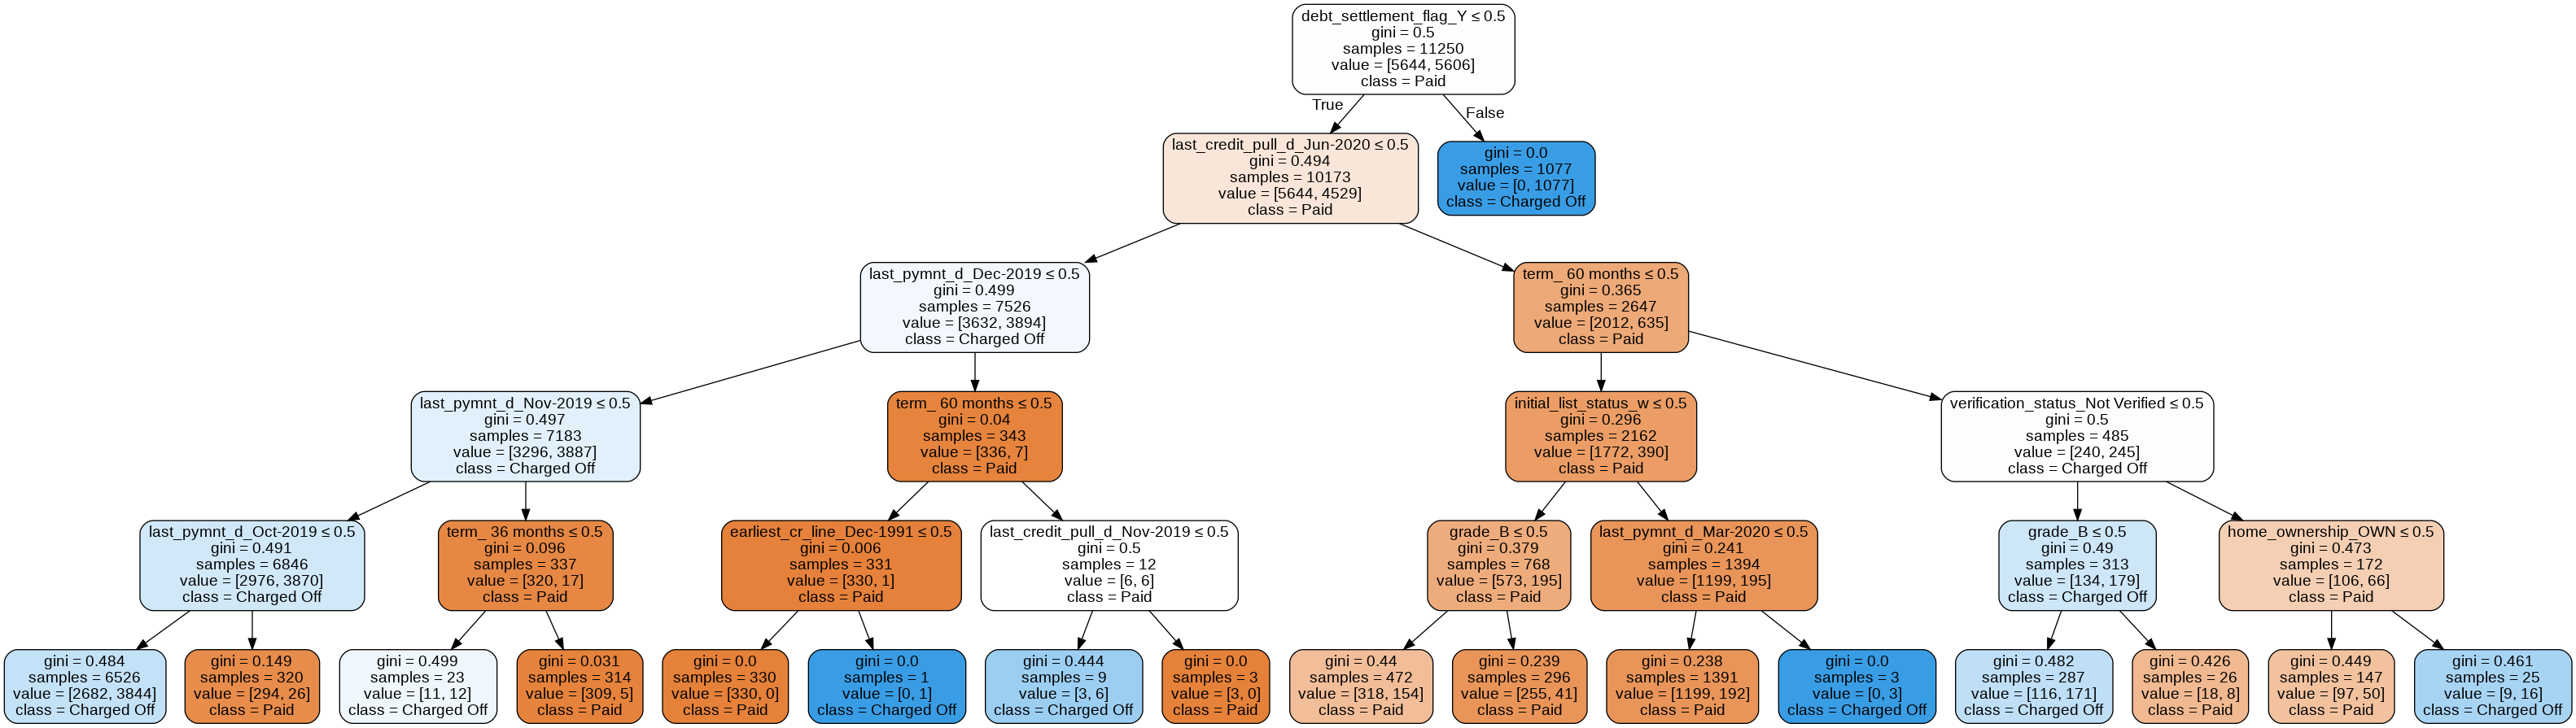

In [38]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X_train.columns.values.tolist(), 
               class_names=['Paid', 'Charged Off'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [39]:
from sklearn.metrics import classification_report
pred_dt_binary = dt_model.predict(X_valid)
print(classification_report(y_valid, pred_dt_binary))

              precision    recall  f1-score   support

           0       0.84      0.48      0.61      1884
           1       0.63      0.91      0.75      1866

    accuracy                           0.69      3750
   macro avg       0.74      0.69      0.68      3750
weighted avg       0.74      0.69      0.68      3750



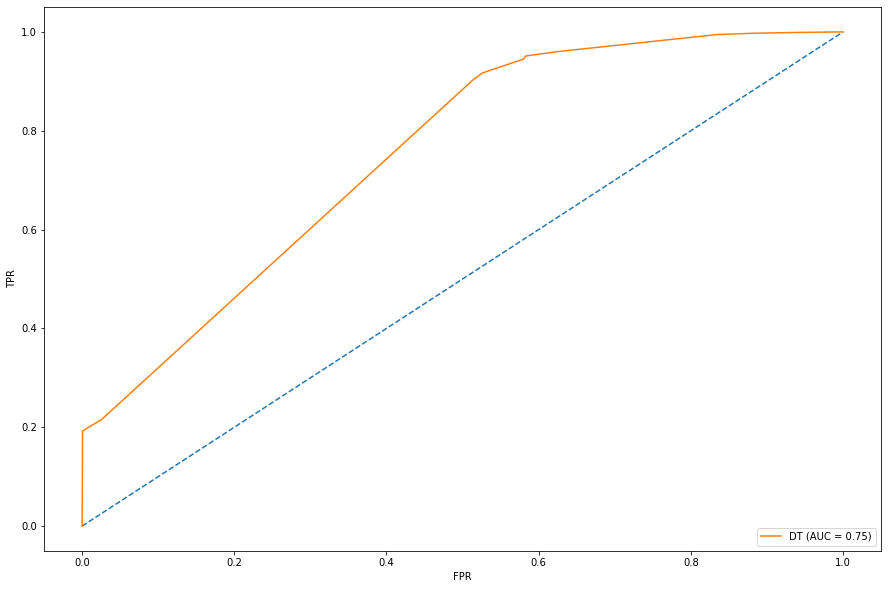

In [40]:
# calculate scores
auc_dt = roc_auc_score(y_valid, pred_dt)

# calculate roc curves
fpr_dt, tpr_dt, _ = roc_curve(y_valid, pred_dt)

plt.figure(figsize=(15, 10))
# plot horizontal line 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_dt, tpr_dt, label='DT (AUC = %0.2f)' % auc_dt)

# axis labels
plt.xlabel('FPR')
plt.ylabel('TPR')
# show the legend
plt.legend(loc='lower right')
# show the plot
plt.show()

### Random Forests

In [41]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators= 50,max_depth=5)  

print(rf_model)

rf_model.fit(X_train, y_train)  
pred_rf = rf_model.predict(X_test)  

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


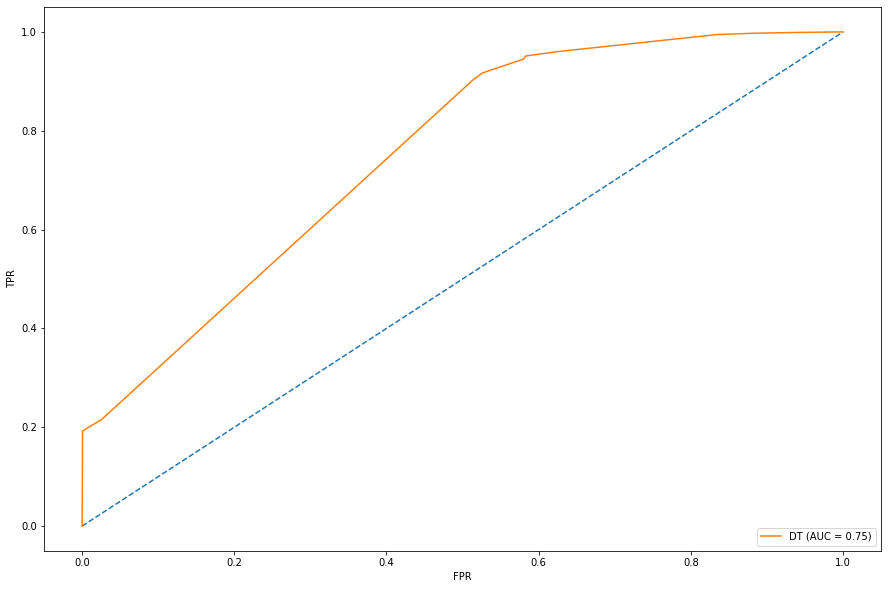

In [42]:
# calculate scores
auc_dt = roc_auc_score(y_valid, pred_dt)

# calculate roc curves
fpr_dt, tpr_dt, _ = roc_curve(y_valid, pred_dt)

plt.figure(figsize=(15, 10))
# plot horizontal line 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_dt, tpr_dt, label='DT (AUC = %0.2f)' % auc_dt)

# axis labels
plt.xlabel('FPR')
plt.ylabel('TPR')
# show the legend
plt.legend(loc='lower right')
# show the plot
plt.show()

### XGBoost

In [46]:
from xgboost import XGBClassifier


xgb_model = XGBClassifier(max_depth=5, n_estimators=50)

print(xgb_model)

xgb_model.fit(X_train, y_train)
pred_xgb =  xgb_model.predict_proba(X_test)[:, 1]

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


ValueError: ignored

### Evaluating model

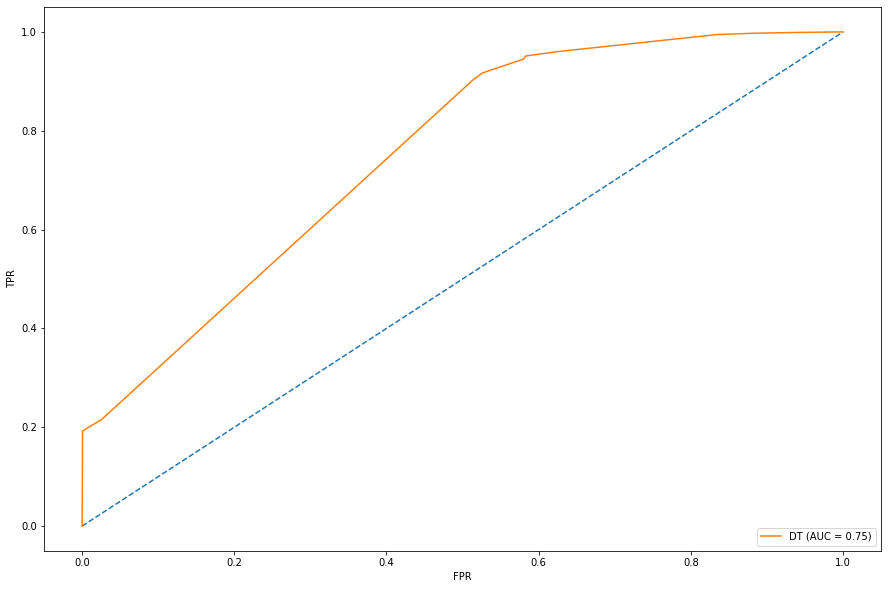

In [44]:
# calculate scores
auc_dt = roc_auc_score(y_valid, pred_dt)

# calculate roc curves
fpr_dt, tpr_dt, _ = roc_curve(y_valid, pred_dt)

plt.figure(figsize=(15, 10))
# plot horizontal line 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_dt, tpr_dt, label='DT (AUC = %0.2f)' % auc_dt)

# axis labels
plt.xlabel('FPR')
plt.ylabel('TPR')
# show the legend
plt.legend(loc='lower right')
# show the plot
plt.show()